## Ананьев Роман

# Лабораторная работа №6
### Проверка гипотез о значениях параметров распределения генеральной совокупности

# Пример 0

<!-- После проведения серии экспериментов была получена
выборка объема 𝑛 из нормально распределенной генеральной совокуп-
ност с неизвестными параметрами. Требовалось проверить гипотезу
H : 0
0
m m  . По выборке были найдены выборочное среднее 𝑥 и не-
смещенная оценка дисперсии 𝑠 .
1-й случай. Оказалось, что 𝑥 меньше 𝑚 , поэтому в качестве аль-
тернативной гипотезы решили использовать гипотезу 𝐻 : 𝑚 < 𝑚 . При
каких уровнях значимости гипотеза 𝐻 будет принята, а при каких от-
клонена? Сопоставьте ваши выводы с формулой нахождения p-
значения п. 3 раздела 6.2.
2-й случай. Оказалось, что 𝑥 больше 𝑚 , поэтому в качестве аль-
тернативной гипотезы решили использовать гипотезу 𝐻 : 𝑚 > 𝑚 . При
каких уровнях значимости гипотеза 𝐻 будет принята, а при каких от-
клонена? Сопоставьте ваши выводы с формулой нахождения p-
значения п. 3 раздела 6.2.
3-й случай. В качестве альтернативной гипотезы решили использо-
вать гипотезу 𝐻 : 𝑚 ≠ 𝑚 . При каких уровнях значимости гипотеза 𝐻
будет принята, а при каких отклонена? Сопоставьте ваши выводы с
формулой нахождения p-значения п. 3 раздела 6.2.
Смоделируйте выборку объема 100 из нормально распределенной
генеральной совокупности с параметрами 2 и 3 и далее используйте ее в
качестве опытных данных. Воспользуйтесь полученными при рассмот-
рении 3-го случая результатами, чтобы найти диапазон значений уровня
значимости, при которых при двусторонней альтернативе будет принята
гипотеза 𝐻 : 𝑚 = 2.
Для проверки гипотезы 𝐻 : 𝑚 = 2 используйте функцию
ttest_1samp. Сопоставьте полученные результаты. -->

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy.special as sc
import statsmodels.api as sm
import statsmodels.stats.weightstats
import statsmodels.stats.proportion

In [2]:
# H0: m = m0; m0=2
n = 100
mu = 2
mu0 = 2
sigm = 3
np.random.seed(46)

#случай 1: mu_hat < m0 -> H1: m < m0
print("Situation 1")
samp = np.random.normal(mu, sigm, n)
mu_hat = np.mean(samp)
s = np.std(samp, ddof = 1)
t_stat, p_val = sts.ttest_1samp(samp, mu0, alternative  = 'less')
print(f'mu_hat = {mu_hat} \np_value  = {p_val}')
p_val_hand = sts.t.cdf(t_stat, n-1)   #p_value посчит вручную 
print()

#случай 2: mu_hat > m0 -> H1: m > m0
print("Situation 2")
samp = np.random.normal(mu, sigm, n)
mu_hat = np.mean(samp)
s = np.std(samp, ddof = 1)
t_stat, p_val = sts.ttest_1samp(samp, mu0, alternative  = 'greater')
print(f'mu_hat = {mu_hat} \np_value  = {p_val}')
print()

#случай 3: mu_hat != m0 -> H1: m != m0
print("Situation 3")
samp = np.random.normal(mu, sigm, n)
mu_hat = np.mean(samp)
s = np.std(samp, ddof = 1)
t_stat, p_val = sts.ttest_1samp(samp, mu0, alternative  = 'two-sided')
print(f'mu_hat = {mu_hat} \np_value  = {p_val}')

Situation 1
mu_hat = 1.7996540297945471 
p_value  = 0.23564054642825472

Situation 2
mu_hat = 2.405019037049474 
p_value  = 0.09992421615426911

Situation 3
mu_hat = 1.709664792269352 
p_value  = 0.2917722134652354


# Пример 1
 <!-- Предположим, у нас есть выборка объема 25 нор-
мально распределенной, генеральной совокупности со средним квадра-
тичным отклонением, равным 2, и неизвестным математическим ожи-
данием. Проверятся гипотеза о равенстве математического ожидания
значению 10 на уровне значимости  . Выборочное среднее, рассчитан-
ное по выборке, оказалось бо́льшим 10, поэтому для проверки гипотезы
выберем правостороннюю альтернативу. Критическую область опреде-
лим, действуя строго по схеме (п. 2 подраздела 6.2). Нас интересует
опосредованная зависимость 2  от  (значений ошибок второго рода
от ошибок первого рода). Найдем аналитическое выражение для этой
зависимости и построим ее график -->

p-value: 0.0018927112921414135


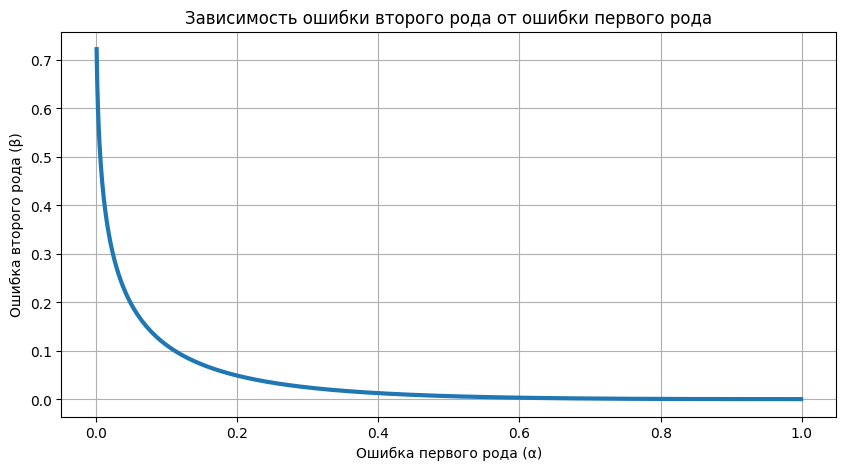

In [3]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

np.random.seed(137)

n = 25
mu = 10       
mu0 = 10     
sigm = 2     

samp = np.random.normal(mu, sigm, n)
mu_hat = np.mean(samp)
se = sigm/np.sqrt(n)     # Стандартная ошибка среднего
Z = (mu_hat - mu0) / se
p_val = 1 - sts.norm.cdf(Z)  # Правосторонний p-value
print(f"p-value: {p_val}")

# Зависимость ошибки второго рода от ошибки первого рода
mu_alt = 11  # альтернативная гипотеза
alpha = np.linspace(0.001, 0.999, 1000)

z_alpha = sts.norm.ppf(1 - alpha)  
x_critical = mu0 + z_alpha * se    # Критические значения для X̄
# Стандартизация при H1 (mu = mu_alt)
z_beta = (x_critical - mu_alt) / se
alpha2 = sts.norm.cdf(z_beta)      # Вероятность не отвергнуть H0 при H1

plt.figure(figsize=(10, 5))
plt.plot(alpha, alpha2, lw=3)
plt.title("Зависимость ошибки второго рода от ошибки первого рода")
plt.xlabel('Ошибка первого рода (α)')
plt.ylabel('Ошибка второго рода (β)')
plt.grid(True)
plt.show()

# Пример 2
 <!-- Пусть исходные данные те же, что и в примере 1, но
задача поставлена иначе. Зафиксируем уровень значимости  и по-
смотрим, как меняется ошибка второго рода при изменении альтерна-
тивных значений математического ожидания. Найдем аналитическое
выражение для этой зависимости и построим ее график -->

Text(0, 0.5, 'alpha2')

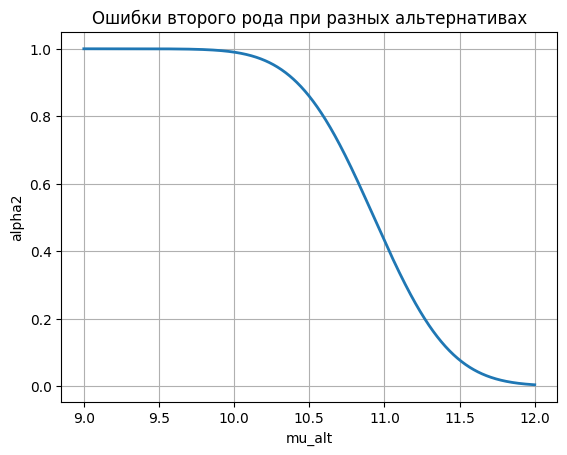

In [4]:
n = 25
mu0 = 10
alpha = 0.01
sigm = 2
mu_alt = np.linspace(9, 12, 1000)
alpha2 = sts.norm(mu_alt, sigm / np.sqrt(n)).cdf(sts.norm(0,1).ppf(1-alpha)*sigm/np.sqrt(n)+mu0)
plt.plot(mu_alt, alpha2, lw = 2)
plt.grid()
plt.title('Ошибки второго рода при разных альтернативах')
plt.xlabel('mu_alt')
plt.ylabel('alpha2')

# Пример 3
 <!-- По-прежнему будем рассматривать выборку из нор-
мально распределенной генеральной совокупности со средним квадра-
тичным отклонением, равным 2, и неизвестным математическим ожи-
данием, только объем выборки конкретизировать не будем (обозначим
его n). Как и в предыдущих примерах, проверяется гипотеза о равен-
стве математического ожидания десяти на уровне значимости  (его
значение для определенности возьмем равным 0,01). Критическую об-
ласть выбираем, исходя из правосторонней альтернативы. Будем искать
ошибки второго рода при некотором альтернативном значении матема-
тического ожидания (например, одиннадцати). Собственно, нас будет
интересовать вопрос, как ошибка второго рода зависит от объема вы-
борки. Для того, чтобы прояснить его, найдем аналитическое выраже-
ние для этой зависимости и построим ее график -->

Text(0, 0.5, 'alpha2')

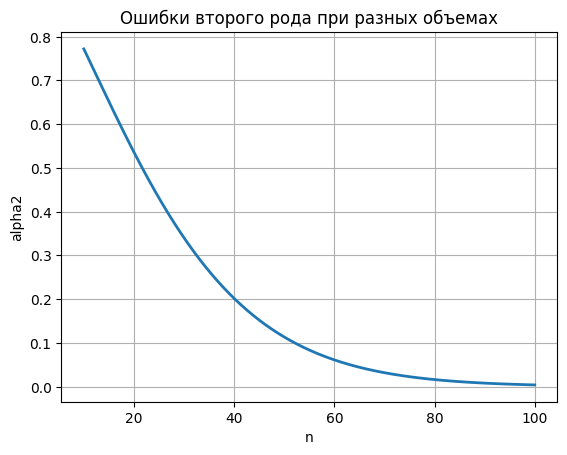

In [5]:
mu0 = 10
mu_alt = 11
alpha = 0.01
sigm = 2
n = np.linspace(10, 100, 1000)
alpha2 = sts.norm(mu_alt, sigm / np.sqrt(n)).cdf(sts.norm(0,1).ppf(1-alpha)*sigm/np.sqrt(n)+mu0)
plt.plot(n, alpha2, lw = 2)
plt.grid()
plt.title('Ошибки второго рода при разных объемах')
plt.xlabel('n')
plt.ylabel('alpha2')


# Задание 1
<!-- . Смоделируйте выборку объема n из нормально
90
распределенной генеральной совокупности с параметрами 0 0 ,
m  (зна-
чение параметров 0 0 ,
m  возьмите равными длине вашего имени и фа-
милии соответственно) и далее используйте ее в качестве опытных дан-
ных.
Задача состоит в проверке гипотезы 0
H : 0  при неизвестном
математическом ожидании. Исходя из значения выборочной дисперсии,
сформулируйте подходящую одностороннюю альтернативу, выберите
статистику и укажите закон ее распределения.
1) Не используя имеющиеся в языке программирования Python
функции проверки параметрических гипотез, вычислите p -значение и
найдите диапазон значений  , при которых основная гипотеза прини-
мается.
2) Выберите одно из значений  из найденного диапазона и, ис-
ходя из соответствующей этому значению критической области (со-
гласно традиционной методике), вычислите ошибку второго рода (пред-
варительно получив аналитическое выражение). -->

In [6]:
#1)
np.random.seed(42)

n = 90
mu = 5
sigm = 7
samp = np.random.normal(mu, sigm, n)
S = np.std(samp, ddof = 1)
# H0: sigm = sigm0
# H1: sigm < sigm0
sigm0 = 7
Z = S**2*(n-1)/sigm0**2        #имеет распределение хи-квадрат с (n-1) степенью свободы
p_val = sts.chi2.cdf(Z, n-1)
print(f' p_value = {p_val:.4f}')
#следовательно гипотеза H0 будет приниматься на уровня значимости альфа равной: (0, 0.2041)

#2) расчитаем значение ошибки второго рода 
alpha = 0.05
sigm_alt = 6

crit = sts.chi2.ppf(alpha, df = n-1) #квантиль хи-квадрат с уровнем значимости alpha; те это то
# значение левее которого, будет находится критическая область 
alpha2 = 1-sts.chi2.cdf(sigm0**2/sigm_alt**2*crit, n-1)
print(f'ошибка второго рода = {alpha2:.4f}')


 p_value = 0.2041
ошибка второго рода = 0.3678


### 2.1

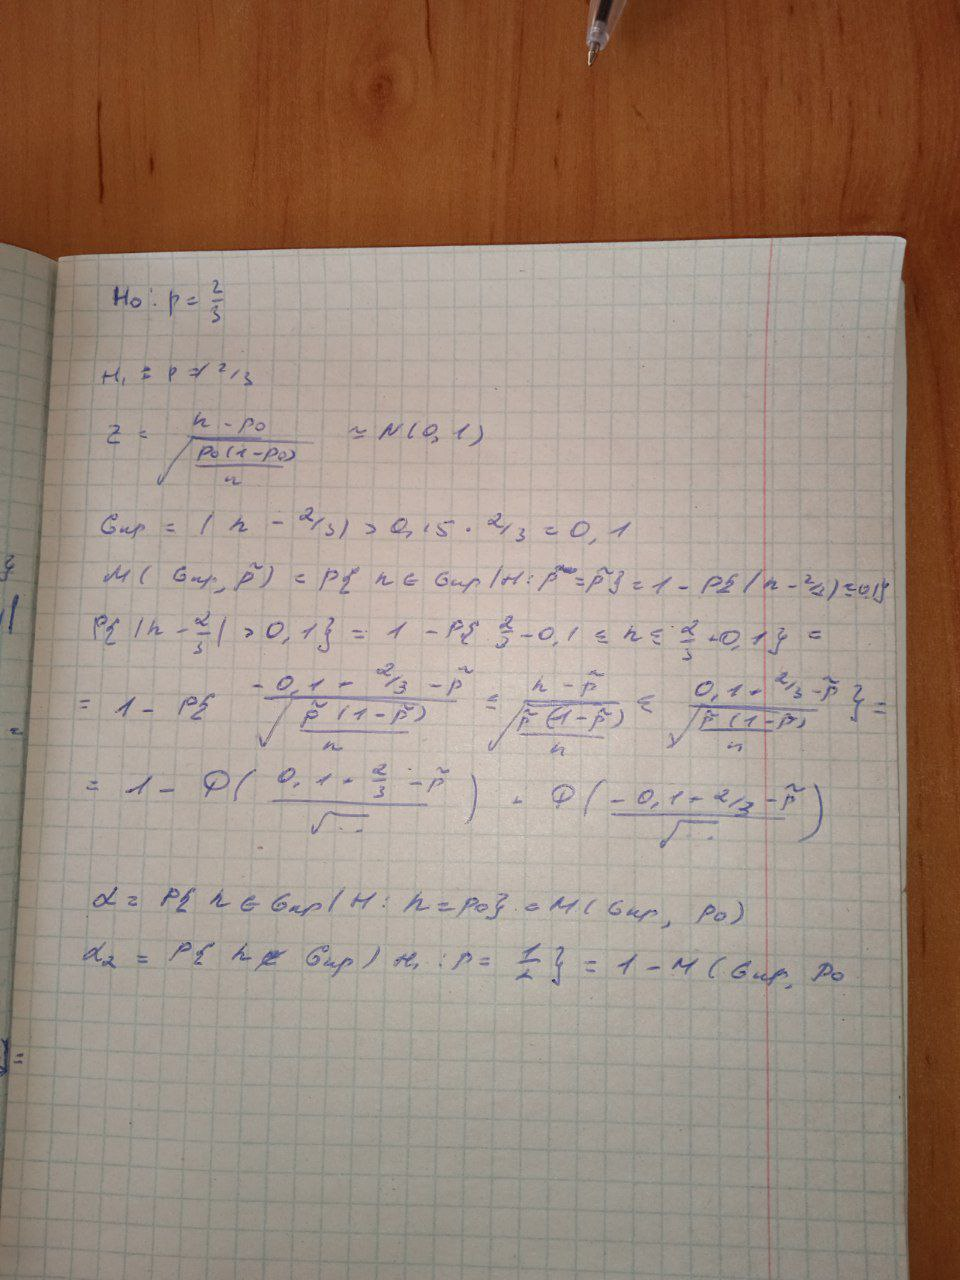

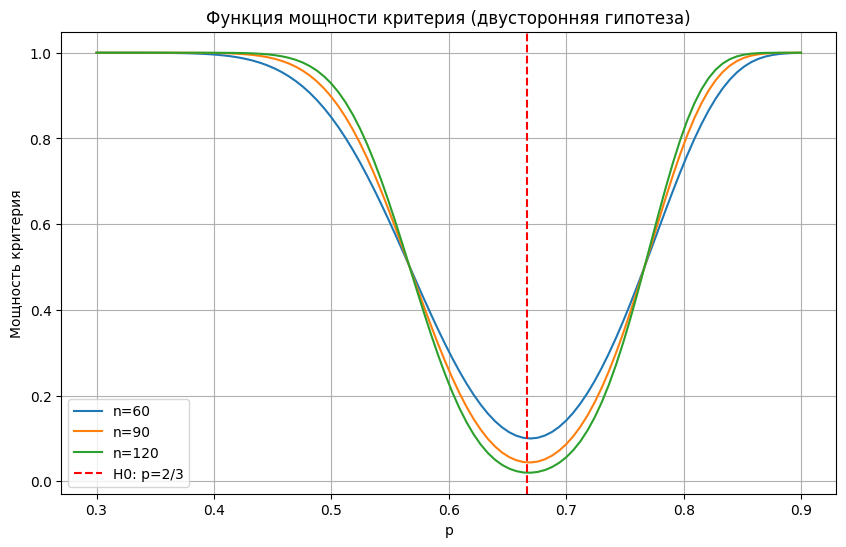

In [7]:
def power_function(p, n):
    
    f_1 = sts.norm.cdf((0.1 + 2/3 - p) / np.sqrt(p * (1 - p) / n))
    f_2 = sts.norm.cdf((-0.1 + 2/3 - p) / np.sqrt(p * (1 - p) / n))

    return 1 - f_1 + f_2

n_list = [60, 90, 120]  
p_values = np.linspace(0.3, 0.9, 100) 

plt.figure(figsize=(10, 6))
for n in n_list:
    power = [power_function(p,n) for p in p_values]
    plt.plot(p_values, power, label=f'n={n}')

plt.axvline(2/3, color='red', linestyle='--', label=f'H0: p=2/3')
plt.xlabel('p')
plt.ylabel('Мощность критерия')
plt.title('Функция мощности критерия (двусторонняя гипотеза)')
plt.legend()
plt.grid()
plt.show()

In [8]:
p_alt = 0.5
for n in n_list:
    print(f"Для n={n}, α(p={p_alt}) = {power_function(p_alt, n):.4f}")

Для n=60, α(p=0.5) = 0.8492
Для n=90, α(p=0.5) = 0.8970
Для n=120, α(p=0.5) = 0.9279


In [9]:
for n in n_list:
    beta = 1 - power_function(p_alt, n)
    print(f"Для n={n}, β(p={p_alt}) = {beta:.4f}")

Для n=60, β(p=0.5) = 0.1508
Для n=90, β(p=0.5) = 0.1030
Для n=120, β(p=0.5) = 0.0721


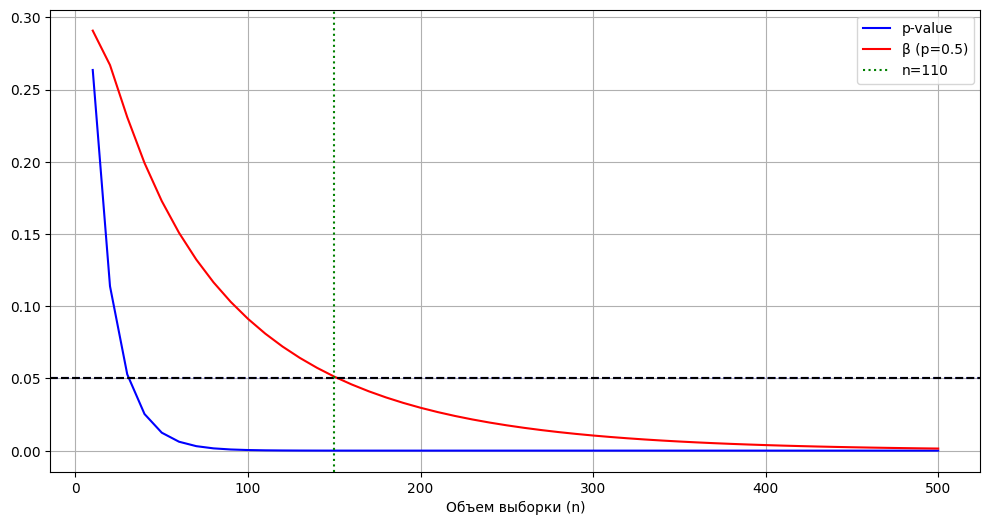

Минимальный объем выборки для p-value ≤ 0.05 и β ≤ 0.05: 150


In [13]:
#2)
# используем p-value, так как p-value верхняя граница уровня значимости, для которого гипотеза принимается
p0 = 2/3       # Нулевая гипотеза
p_alt = 0.5    # Альтернативная гипотеза

n_values = np.arange(10, 501, 10)

p_values = []
beta_values = []

for n in n_values:
    z = (p_alt - p0)/np.sqrt(p0*(1-p0)/n)
    p_value = 2 * min(1 - sts.norm.cdf(abs(z)), sts.norm.cdf(abs(z)))  # Двусторонняя гипотеза

    beta = 1 - power_function(p_alt, n)
    
    p_values.append(p_value)
    beta_values.append(beta)


plt.figure(figsize=(12, 6))
# График p-value
plt.plot(n_values, p_values, 'b-', label='p-value')
plt.axhline(0.05, color='blue', linestyle='--')
# График ошибки второго рода
plt.plot(n_values, beta_values, 'r-', label='β (p=0.5)')
plt.axhline(0.05, color='black', linestyle='--')
plt.axvline(150, color='g', linestyle=':', label='n=110')
plt.xlabel('Объем выборки (n)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Минимальный объем выборки для p-value ≤ 0.05 и β ≤ 0.05: 150")